In [1]:
import pycaret
from platform import python_version
print(f'Pycaret version: {pycaret.__version__}\nPython version: {python_version()}')

Pycaret version: 3.0.0
Python version: 3.9.16


# Yellow Brick and SKlearn

In [2]:
# load sample dataset
import pandas as pd
import seaborn as sns

#from ydata_profiling import ProfileReport

data = pd.read_csv('C:/Users/piett/Intro Pycaret/Pycaret3/data/euBnB_transformed.csv')
print(data.shape)
data

(42316, 26)


,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,...,european_city_Athens,european_city_Berlin,european_city_Barcelona,european_city_Paris,european_city_Vienna,european_city_Budapest,weekday_or_weekend,attr_index,rest_index,cost per night cad
0,1.0,0.0,0.0,3.0,False,1.0,0.0,8.0,91.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.099550,669.945200,101.035700
1,0.0,1.0,0.0,2.0,False,1.0,0.0,10.0,99.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,228.921740,303.715900,224.270610
2,1.0,0.0,0.0,4.0,True,1.0,0.0,10.0,97.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.983700,467.434360,171.200740
3,1.0,0.0,0.0,4.0,False,0.0,1.0,8.0,80.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.245804,95.595505,200.818480
4,0.0,1.0,0.0,2.0,True,0.0,0.0,10.0,97.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.628740,347.445920,164.133680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42311,0.0,1.0,0.0,2.0,False,1.0,0.0,10.0,95.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,91.147110,228.168270,64.885086
42312,0.0,1.0,0.0,3.0,True,0.0,1.0,10.0,100.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,896.202640,2000.408900,225.452970
42313,0.0,1.0,0.0,2.0,True,0.0,0.0,10.0,98.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,138.113070,213.566940,165.168410
42314,1.0,0.0,0.0,4.0,False,0.0,0.0,9.0,93.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,120.696260,306.788120,183.184800


In [3]:
#data.info()
data_unseen = data.sample(frac=0.1)
data = data.drop(data_unseen.index)
print(f'Data for model: {data.shape}, \nData for unseen predicitions: {data_unseen.shape}')
data_unseen.to_csv('C:/Users/piett/Intro Pycaret/Pycaret3/data/euBnB_unseenX.csv', index=False)

Data for model: (38084, 26), 
Data for unseen predicitions: (4232, 26)


In [4]:
X = data.drop(['cost per night cad'], axis= 1)
y = data['cost per night cad']

In [12]:
%%time

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)


models = [
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=600, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print(f"{estimator.__class__.__name__}:\n R_sq: {r2_score(expected, predicted):.4}\n"
          f" MAE: {mean_absolute_error(expected, predicted):,.2f}\n"
         )

for model in models:
    score_model(X, y, model)

XGBRegressor:
 R_sq: 0.7687
 MAE: 23.52

Wall time: 51.4 s


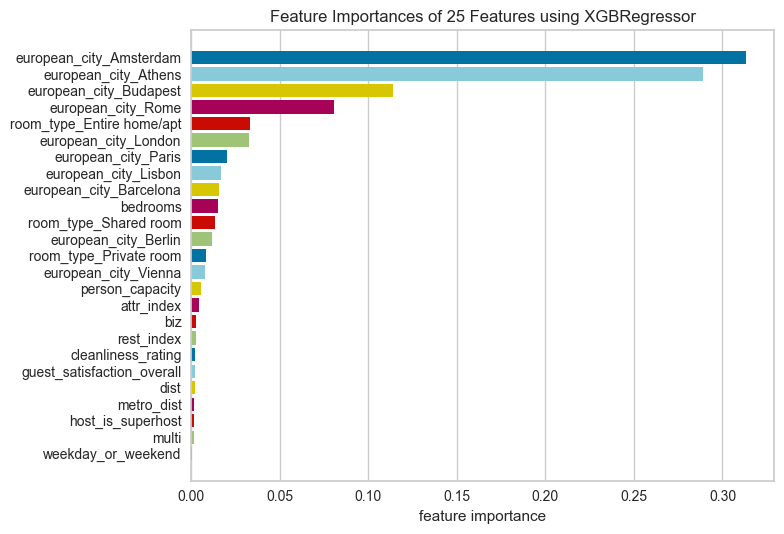

In [13]:
model= XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=600, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None)

from yellowbrick.model_selection import feature_importances
feature_importances(model, X, y, relative=False);

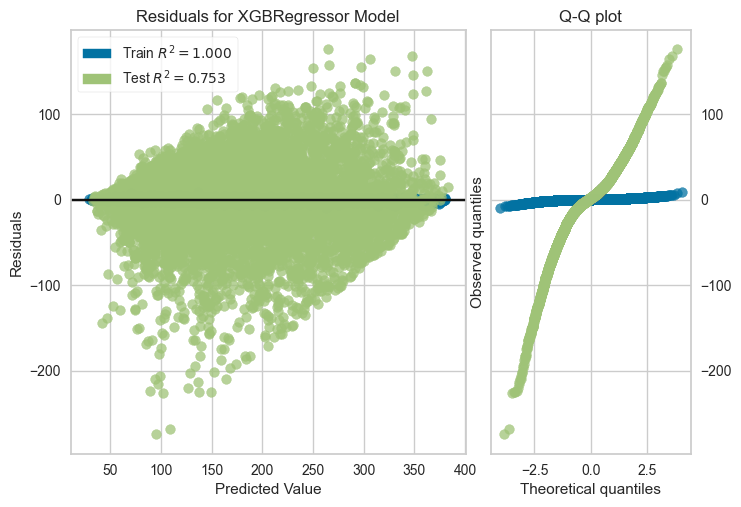

In [14]:
model= XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=600, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None)

from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, hist=False, qqplot=True)

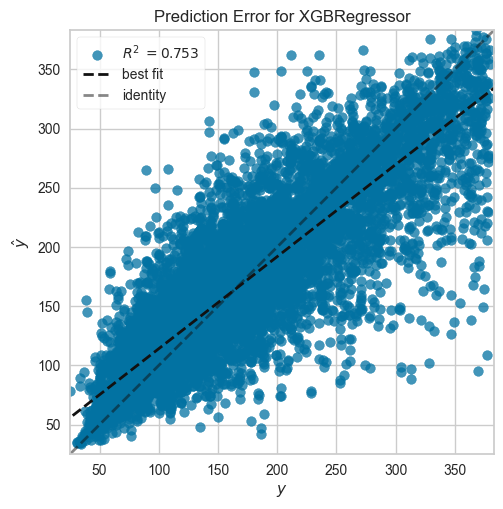

In [15]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

# Predict the model

In [17]:
data_unseen = pd.read_csv('C:/Users/piett/Intro Pycaret/Pycaret3/data/euBnB_unseenX.csv')
#data_predunseen = data_unseen.drop(['cost per night cad'])
data_to_pred = data_unseen.drop(['cost per night cad'], axis= 1)

In [18]:
pred = model.predict(X=data_to_pred)
pred

array([152.54268,  73.08808, 189.93033, ..., 190.88504, 128.3918 ,
       318.6687 ], dtype=float32)

In [19]:
pred_results = data_unseen.loc[:,['cost per night cad']]
pred_results['y_pred'] = pred
pred_results['Percent Diff'] = (pred_results['cost per night cad']-pred_results['y_pred'])/pred_results['cost per night cad']
pred_results

,cost per night cad,y_pred,Percent Diff
0,143.73357,152.542679,-0.061288
1,113.31405,73.088081,0.354995
2,97.78164,189.930328,-0.942393
3,218.62335,208.950516,0.044244
4,50.51785,105.855576,-1.095409
...,...,...,...
4227,171.46053,221.748901,-0.293294
4228,133.29202,153.220734,-0.149512
4229,204.75423,190.885040,0.067736
4230,103.87121,128.391800,-0.236067


In [20]:
pred_results.describe().T

,count,mean,std,min,25%,50%,75%,max
cost per night cad,4232.0,161.927826,74.645630,29.334492,104.909437,143.823030,202.412730,379.773740
y_pred,4232.0,161.980682,67.288277,34.006580,110.351292,149.897400,201.544533,385.230072
Percent Diff,4232.0,-0.043900,0.238454,-1.702853,-0.136460,-0.010555,0.080702,0.654194
